# Задание 1
### **Вторичный рынок автомобилей Молдовы**

#### *На первом этапе выполнения задания проводится начальная работа с данными и их очистка от выбросов.*
*(в соответствии с блокнотами "Неделя 1" и "Неделя 2")*

#### Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Начальная работа с данными

#### Загрузка файла с исходными данными

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/cars_moldova.csv', delimiter = ',')
# Проверяем правильность считывания файла.
df.head()

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0

In [ ]:
# Получаем общую информацию о датафрейме.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB


#### Поиск и удаление дубликатов

In [ ]:
# Проверям наличие строк-дубликатов.
df.duplicated().sum()

3743

In [ ]:
# Удаляем дубликаты.
df = df.drop_duplicates()
# Обновляем индекс датафрейма.
df = df.reset_index(drop=True)
# Выводим очищенный от дубликатов датафрейм.
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2      Volkswagen          Golf  1998  Hatchback       1.0   
3         Renault        Laguna  2012  Universal  110000.0   
4            Opel         Astra  2006  Universal  200000.0   
...           ...           ...   ...        ...       ...   
37259  Land Rover    Freelander  2002  Crossover  225000.0   
37260       Dacia     Logan Mcv  2015  Universal   89000.0   
37261     Renault         Modus  2009  Hatchback     225.0   
37262       Mazda             6  2006      Combi  370000.0   
37263     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2                    1400.0        Petrol       Manual       2200.0  
3                    1500.0        Diesel       Manual       6550.0  
4                    1600.0  Metan/Propan       Manual       4100.0  
...                     ...           ...          ...          ...  
37259                1800.0  Metan/Propan       Manual       4400.0  
37260                1500.0        Diesel       Manual       7000.0  
37261                1500.0        Diesel       Manual       4500.0  
37262                2000.0        Diesel       Manual       4000.0  
37263                1500.0        Diesel       Manual       4000.0  

[37264 rows x 9 columns]

In [ ]:
# Убедимся, что дубликатов не осталось
df.duplicated().sum()

0

#### Сохранение DataFrame в файл

In [ ]:
df.to_csv('/content/cars_moldova_no_dup.csv',index=False)

#### Exploratory Data Analysis (EDA) / Разведывательный анализ данных

In [ ]:
# Получаем общую информацию об очищенном от дубликатов датафрейме.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  37264 non-null  object 
 1   Model                 37264 non-null  object 
 2   Year                  37264 non-null  int64  
 3   Style                 37264 non-null  object 
 4   Distance              37264 non-null  float64
 5   Engine_capacity(cm3)  37264 non-null  float64
 6   Fuel_type             37264 non-null  object 
 7   Transmission          37264 non-null  object 
 8   Price(euro)           37264 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ MB


In [ ]:
# Создаем списки названий(меток) столбцов, содержащих категориальные и числовые
# данные соответственно.
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


#### EDA - Анализ числовых признаков

In [ ]:
# Выводим общую статистику по числовым признакам.
df.describe()

Year      Distance  Engine_capacity(cm3)   Price(euro)
count  37264.000000  3.726400e+04          37264.000000  3.726400e+04
mean    2007.709264  4.758488e+05           1858.932535  9.569387e+03
std        8.295806  4.591520e+06            707.662731  5.283315e+04
min     1900.000000  0.000000e+00              0.000000  1.000000e+00
25%     2004.000000  9.000000e+04           1499.000000  3.300000e+03
50%     2009.000000  1.700000e+05           1800.000000  6.490000e+03
75%     2014.000000  2.300000e+05           2000.000000  1.179900e+04
max     2021.000000  1.000000e+08           9999.000000  1.000000e+07

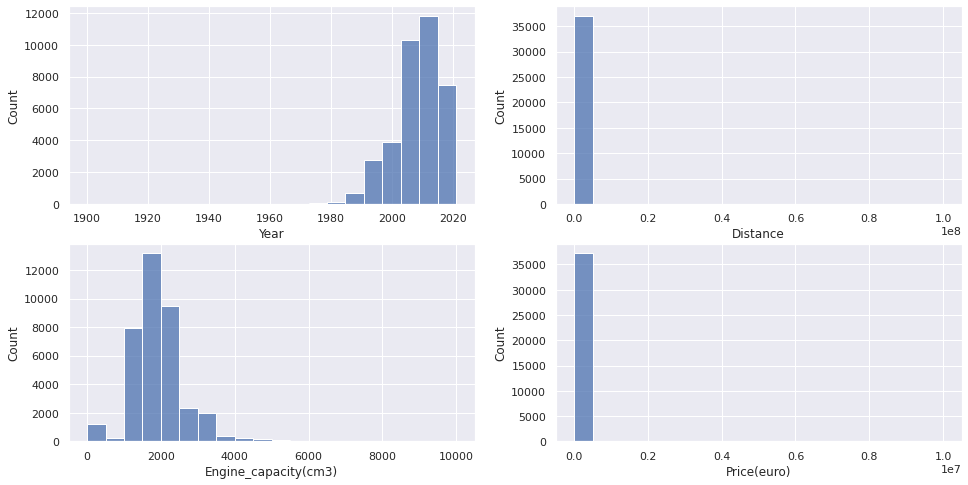

In [ ]:
# Строим гистограммы числовых признаков
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

#### Анализ и удаление явных аномалий

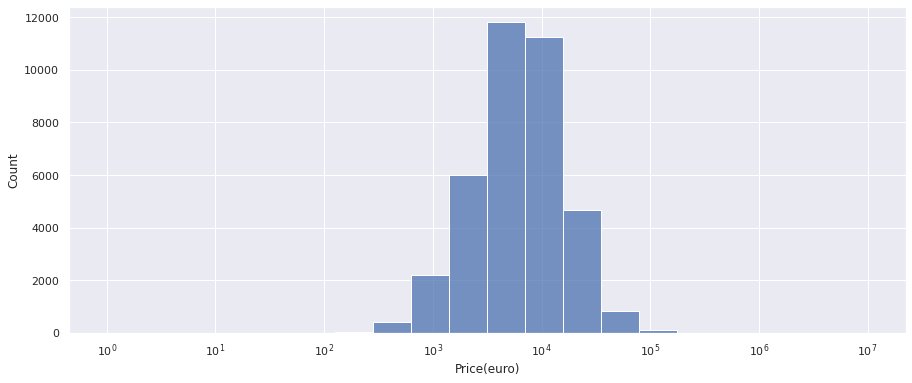

In [ ]:
# Для анализа аномалий в столбцах Price(euro) и Distance построим гистограммы
# этих признаков в логарифмическом масштабе.

# Строим гистограмму в логарифмическом масштабе для столбца Price(euro):
plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Price(euro)', bins = 20, log_scale = True);

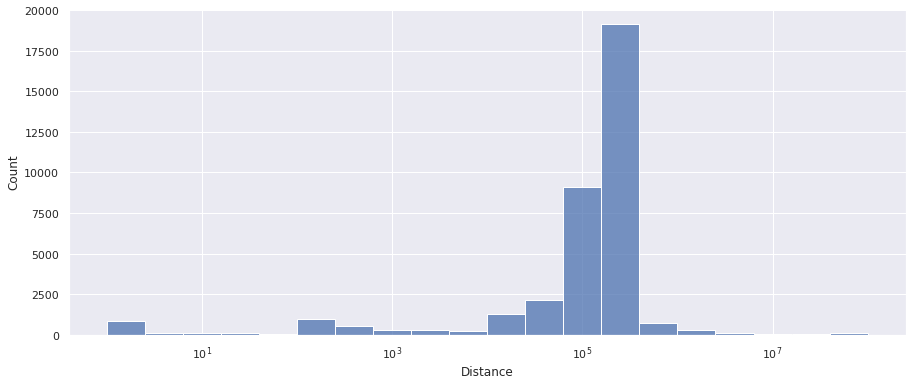

In [ ]:
# Удаляем строки с нулями в столбце Distance (т.е. данные об автомобилях,
# пробег которых равен нулю).
questionable_dist = df[df.Distance == 0]
df = df.drop(questionable_dist.index)

# Строим гистограмму в логарифмическом масштабе.
plt.figure(figsize=(15,6))
sns.histplot(data=df,
            x='Distance', bins = 20, log_scale = True);

In [ ]:
# Исходя из анализа гистограмм, приведенных выше, а также базовых
# представлений о типичных категориях автомобилей, представленных на
# вторичном рынке, удаляем следующие данные:

# Автомобили ранее 2021 года выпуска с пробегом менее 1100 км.
questionable_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(questionable_dist.index)

# Автомобили с пробегом более 1 млн. км.
questionable_dist = df[(df.Distance > 1e6)]
df = df.drop(questionable_dist.index)

# Автомобили с объемом двигателя менее 200 куб. см.
questionable_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(questionable_engine.index)

# Автомобили с объемом двигателя более 5000 куб. см.
questionable_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(questionable_engine.index)

# Автомобили ценой менее 101 евро
questionable_price = df[(df["Price(euro)"] < 101)]
df = df.drop(questionable_price.index)

# Автомобили ценой более 100 тыс. евро
questionable_price = df[df["Price(euro)"] > 1e5]
df = df.drop(questionable_price.index)

# Автомобили ранее 1971 года выпуска
questionable_year = df[df.Year < 1971]
df = df.drop(questionable_year.index)

# Обновляем индекс и проверяем корректность получившегося датафрейма.
df = df.reset_index(drop=True)
df.tail()

Make         Model  Year      Style  Distance  \
32529  Volkswagen        Passat  2016      Sedan   88000.0   
32530  Land Rover    Freelander  2002  Crossover  225000.0   
32531       Dacia     Logan Mcv  2015  Universal   89000.0   
32532       Mazda             6  2006      Combi  370000.0   
32533     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
32529                1800.0        Petrol    Automatic      11500.0  
32530                1800.0  Metan/Propan       Manual       4400.0  
32531                1500.0        Diesel       Manual       7000.0  
32532                2000.0        Diesel       Manual       4000.0  
32533                1500.0        Diesel       Manual       4000.0

In [ ]:
# Получаем общую информацию об очищенном от явных аномалий датафрейме.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32534 entries, 0 to 32533
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32534 non-null  object 
 1   Model                 32534 non-null  object 
 2   Year                  32534 non-null  int64  
 3   Style                 32534 non-null  object 
 4   Distance              32534 non-null  float64
 5   Engine_capacity(cm3)  32534 non-null  float64
 6   Fuel_type             32534 non-null  object 
 7   Transmission          32534 non-null  object 
 8   Price(euro)           32534 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


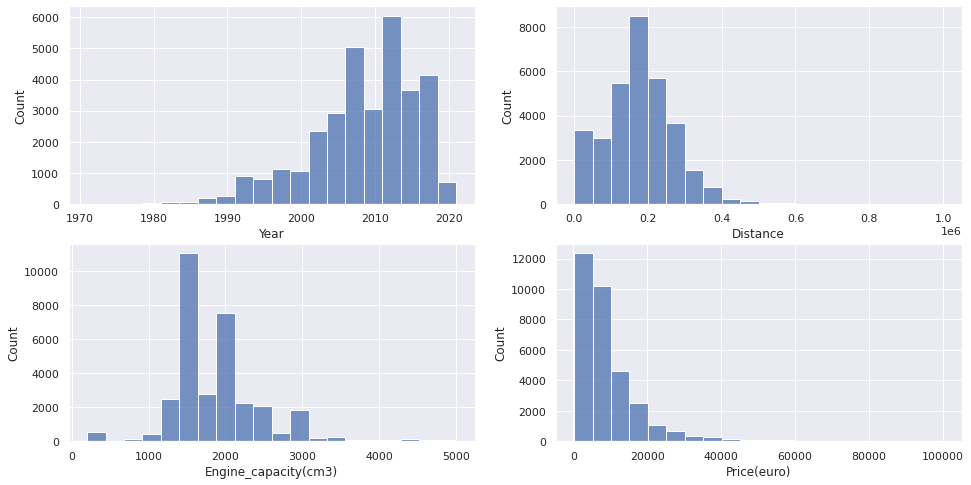

In [ ]:
# Строим гистограммы числовых признаков для очищенного от явных аномалий
# датафрейма.
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

**<Визуализация зависимости целевой категории для задачи классификации ('Transmission') от числовых параметров>**

<Figure size 1080x1080 with 0 Axes>

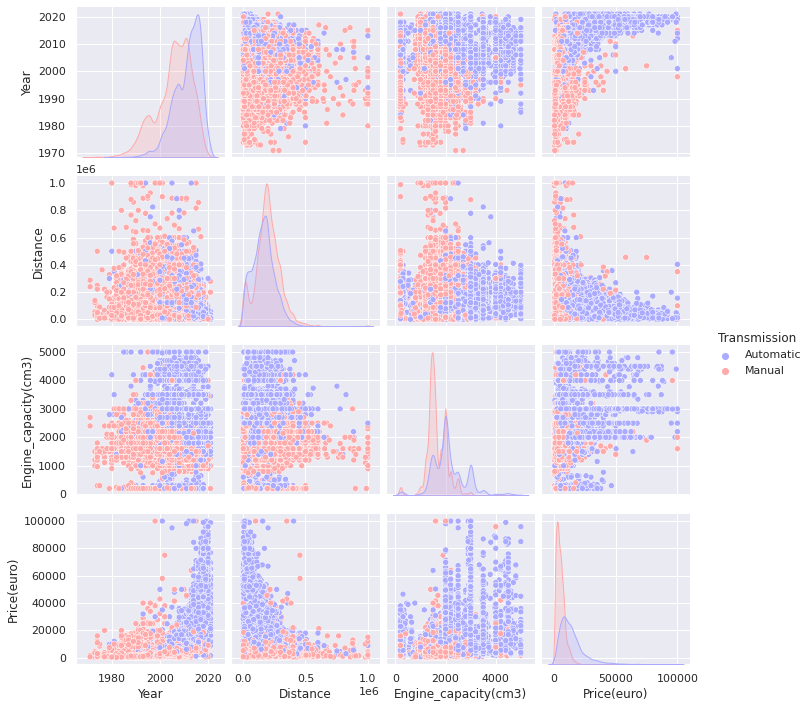

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df,
             hue ='Transmission',
             palette = 'bwr',);

# 1. Визуализация данных с использованием библиотеки Pandas (задание)

Использованы данные датафрейма, очищенного от явных аномалий. После проверки различных вариантов графиков приоритет был отдан не самым "красочным", а тем, которые, как предствляется, наиболее наглядно позволяют увидеть зависимости цен автомобилей от других числовых параметров.

### 1.1 Зависимость цены от года выпуска

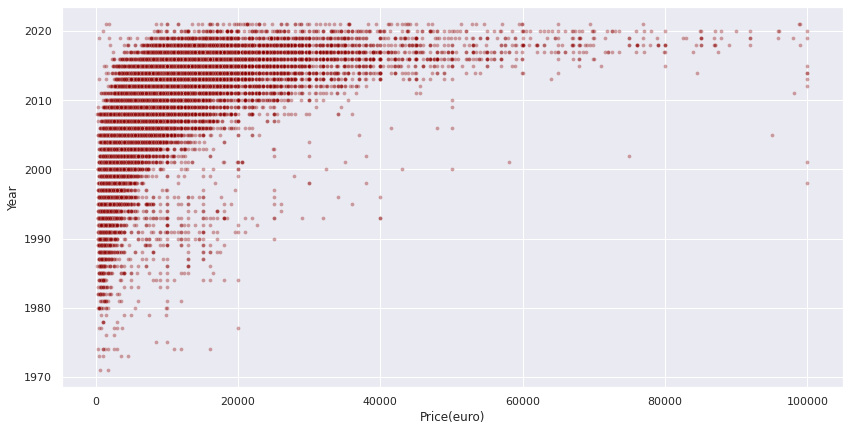

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(
    data=df,
    x='Price(euro)',
    y='Year',
    color='darkred',
    s=15,
    alpha = 0.35,
    );

Выводы: Основной массив данных отчтливо демонстрирует обратную зависимость цены от возраста автомобиля. Также хорошо видно практически полное отсутсвие относительно новых автомобилей в самой нижней ценовой категории.

### 1.2 Зависимость цены от пробега

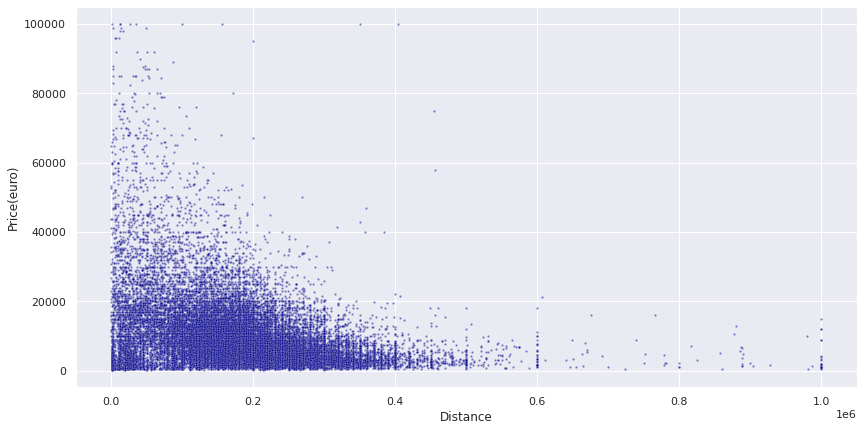

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(
    data=df,
    x='Distance',
    y='Price(euro)',
    color='darkblue',
    s=5,
    alpha = 0.5,
    );

Выводы: Обратная зависимость цены от пробега видна достаточно отчетливо. При этом, в отличии от ситуации с годом выпуска, наблюдается относительно больше автомобилей с незначительным пробегом в самой низшей ценовой категории, т.е. другие факторы, влияющие на цену, в данном случае перевешивают. Также обращают на себя внимание "столбики" на "круглых" значениях пробега (400, 500, 600 тыс. и др.), что может свидетельствовать о значительной доли округлений для самых высоких значений пробега.

### 1.3 Зависимость цены от объема двигателя и типа коробки передач

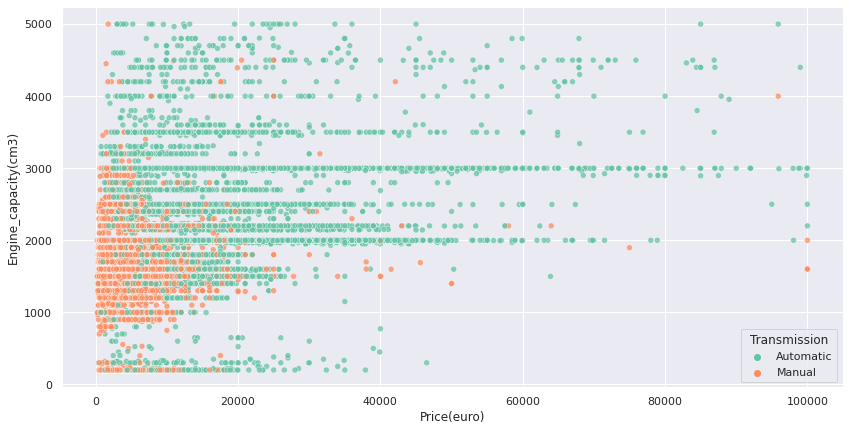

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(
    data=df,
    x='Price(euro)',
    y='Engine_capacity(cm3)',
    hue="Transmission",
    alpha = 0.75,
    palette='Set2'
    );

Выводы: Отчетливой зависимости цены от объема двигателя не просматривается. Для автомобилей с автоматической коробкой передач самые высокие значения цены заметны для объема двигателя в 3000 куб. см. а с ручной коробкой передач - ближе к 1500 куб. см. (Интересно сравнить это со средними показателями объема двигателя, что будет сделано ниже.) Также видна определенная "дискретность" значений объема, что неудивительно, так как в документах эти значения часто указываются с округлением до 100 куб. см. Кроме того, несколько настораживает большое число значений объема двигателя в диапазоне от 200 до 300 куб. см. - это может свидетельствовать об ошибках на порядок.

**Сравнение со средними значаниями объемов двигателя для автомобилей с различными типами коробки передач**

In [ ]:
df[df.Transmission == 'Automatic']['Engine_capacity(cm3)'].mean()

2136.0079837618405

In [ ]:
df[df.Transmission == 'Manual']['Engine_capacity(cm3)'].mean()

1642.808268559198

Таким образом, для автомобилей с автоматической коробкой передач максимальные цены характерны для объемов двигателей больше среднего для данной категории. В то же время, для автомобилей с ручной коробкой передач такой разницы не видно - максимальные цены характерны для средних значений объема двигателя.

### 1.4 Распределение цен автомобилей в зависимости от видов используемого топлива
(Для большей наглядности используются логарифмические значения цен.)

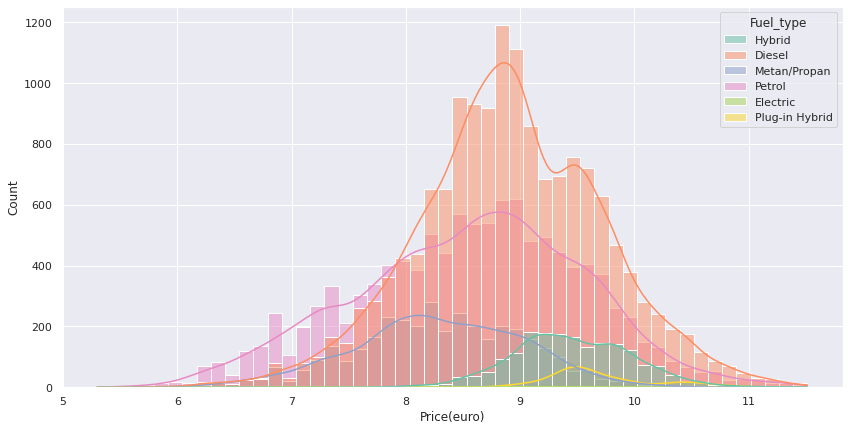

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(
    data=df,
    x= np.log(df['Price(euro)']),
    bins=50,
    hue="Fuel_type",
    kde=True,
    palette='Set2'
    );

Выводы: Медианные значения цен на автомобили с дизельными и бензиновыми двигателями приблизительно равны. Вместе с этим в нижней ценовой категории ватомобилей с бензиновыми двигателями значительно больше, чем дизельных. Автомобили, работабщие на сжиженном газе, в среднем значительно дешевле дизельных и бензиновых, а гибридные (как обычные, так и Plug-in Hybrids) - заметно дороже. Данные о ценах электромобилей не видны из-за их крайней малочисленности.

<Далее продолжается выполнение операций в соответствии с блокнотом "Неделя 2">

# Предварительная Обработка
#### **Нормализация**

In [ ]:
df_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_norm[num_columns] = (df[num_columns]- Xmin)/(Xmax - Xmin)

In [ ]:
# Проверим получившийся датафрейм
df_norm.head()

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0    Toyota         Prius  0.80  Hatchback  0.194999              0.333333   
1   Renault  Grand Scenic  0.86  Universal  0.134999              0.270833   
2   Renault        Laguna  0.82  Universal  0.109999              0.270833   
3      Opel         Astra  0.70  Universal  0.199999              0.291667   
4  Mercedes          Vito  0.58   Microvan  0.299999              0.416667   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic     0.075651  
1        Diesel       Manual     0.083667  
2        Diesel       Manual     0.063627  
3  Metan/Propan       Manual     0.039078  
4        Diesel       Manual     0.032966

**<Сравнение гистограмм значений пробега для автомобилей с различными видами коробок передач>**

а) Гистограмма распределения пробега для датафрейма, очищенного от явных аномалий

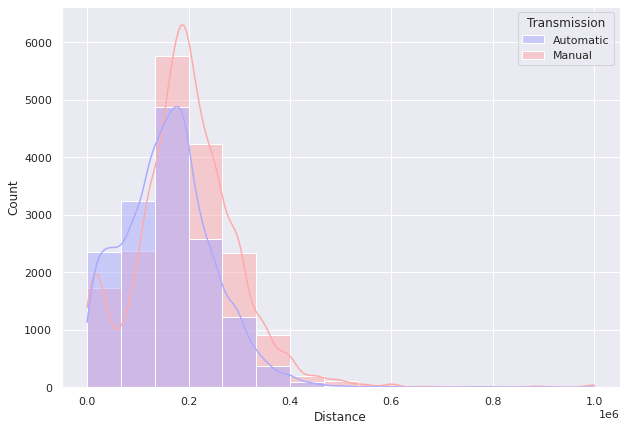

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15,
             kde = True,
             palette='bwr')

б) Гистограмма распределения пробега для нормализованного датафрейма

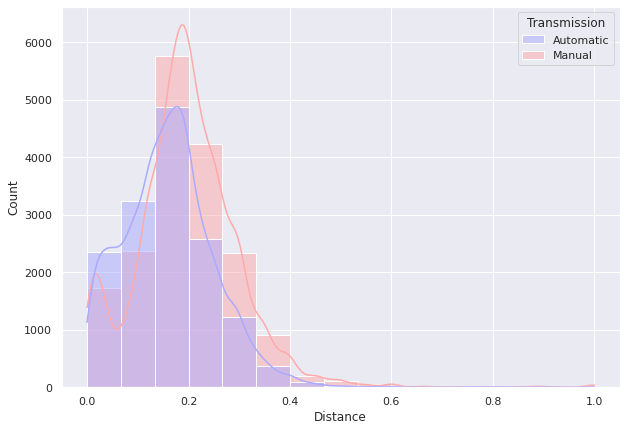

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15,
             kde = True,
             palette='bwr')

Вывод: После проведения нормализации форма гистограмм не изменилась, но изменился порядок значений на оси абсцисс.

In [ ]:
# Сохраняем файл с нормализованными данными
df_norm.to_csv('/content/cars_moldova_normalized.csv',index=False)

#### **Стандартизация**

In [ ]:
df_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
df_scaled[num_columns] = (df[num_columns]-M)/STD

In [ ]:
# Проверим получившийся датафрейм
df_scaled.head()

Make         Model      Year      Style  Distance  \
0    Toyota         Prius  0.381957  Hatchback  0.134535   
1   Renault  Grand Scenic  0.796093  Universal -0.470752   
2   Renault        Laguna  0.520002  Universal -0.722955   
3      Opel         Astra -0.308271  Universal  0.184975   
4  Mercedes          Vito -1.136544   Microvan  1.193787   

   Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0             -0.109715        Hybrid    Automatic    -0.175083  
1             -0.601963        Diesel       Manual    -0.091023  
2             -0.601963        Diesel       Manual    -0.301174  
3             -0.437881  Metan/Propan       Manual    -0.558610  
4              0.546615        Diesel       Manual    -0.622706

**<Сравнение гистограмм значений пробега для автомобилей с различными видами коробок передач (продолжение)>**

в) Гистограмма распределения пробега для стандартизированного датафрейма

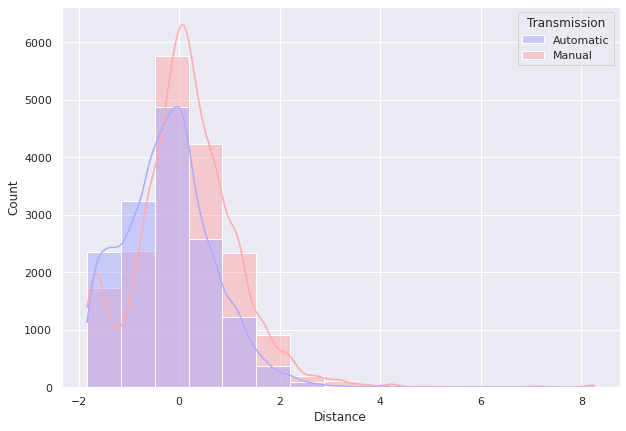

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df_scaled,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15,
             kde = True,
             palette='bwr')

Вывод: После проведения стандартизации форма гистограмм осталась прежней, но значения по оси абсцисс изменились.

In [ ]:
# Сохраняем файл со стандартизированными данными
df_scaled.to_csv('/content/cars_moldova_scaled.csv',index=False)

#### **Нелинейное преобразование**

Сначала логарифмирование, потом стандартизация

In [ ]:
df_power = df.copy()
df_power[num_columns] = np.log(df_power[num_columns])
M = df_power[num_columns].mean()
STD = df_power[num_columns].std()
df_power[num_columns] = (df_power[num_columns]-M)/STD

In [ ]:
# Проверим получившийся датафрейм
df_power.head()

Make         Model      Year      Style  Distance  \
0    Toyota         Prius  0.382866  Hatchback  0.343197   
1   Renault  Grand Scenic  0.795440  Universal -0.049452   
2   Renault        Laguna  0.520459  Universal -0.268127   
3      Opel         Astra -0.306127  Universal  0.370231   
4  Mercedes          Vito -1.135188   Microvan  0.803178   

   Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0              0.060815        Hybrid    Automatic     0.214050  
1             -0.416125        Diesel       Manual     0.321869  
2             -0.416125        Diesel       Manual     0.029415  
3             -0.247297  Metan/Propan       Manual    -0.484752  
4              0.585754        Diesel       Manual    -0.661548

**<Сравнение гистограмм значений цены для автомобилей с различными видами коробок передач>**

а) Гистограмма распределения цен для датафрейма, очищенного от явных аномалий

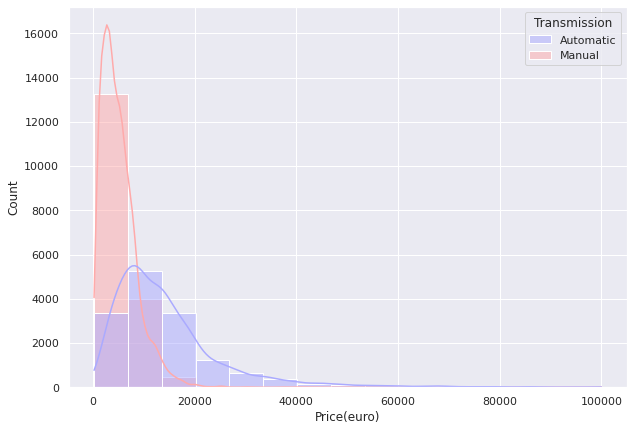

In [ ]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df,
             x = 'Price(euro)',
             hue = 'Transmission',
             bins = 15,
             kde = True,
             palette='bwr')

б) Гистограмма распределения цен для датафрейма, который был логарифмирован и стандартизирован

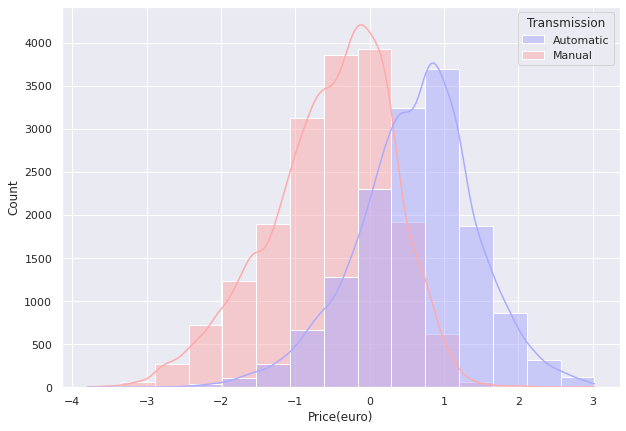

In [ ]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df_power,
             x = 'Price(euro)',
             hue = 'Transmission',
             bins = 15,
             kde = True,
             palette='bwr')

Вывод: После проведения логарифмирования и стандартизации распределение цен стало близко к нормальному.

**<Визуализация результата логарифмирования значений цен>**

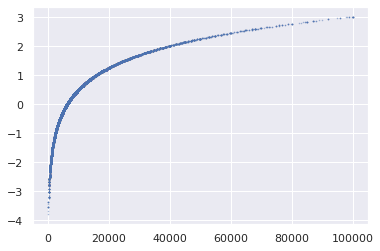

In [ ]:
plt.plot(df['Price(euro)'],
         df_power['Price(euro)'],
         '.',
         alpha = 0.5,
         markersize = 1)

In [ ]:
# Сохраняем файл с логарифмированнными и стандартизированными данными
df_power.to_csv('/content/cars_moldova_power.csv',index=False)

### Добавление нового признака
**Удельный пробег за год**


In [ ]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
questionable_km_year = df[df.km_year > 50e3]
df = df.drop(questionable_km_year.index)
questionable_km_year = df[df.km_year < 100]
df = df.drop(questionable_km_year.index)
df = df.reset_index(drop=True)

In [ ]:
# Проверим получившийся датафрейм
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32215  Volkswagen        Passat  2016      Sedan   88000.0   
32216  Land Rover    Freelander  2002  Crossover  225000.0   
32217       Dacia     Logan Mcv  2015  Universal   89000.0   
32218       Mazda             6  2006      Combi  370000.0   
32219     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
0                    1800.0        Hybrid    Automatic       7750.0   11   
1                    1500.0        Diesel       Manual       8550.0    8   
2                    1500.0        Diesel       Manual       6550.0   10   
3                    1600.0  Metan/Propan       Manual       4100.0   16   
4                    2200.0        Diesel       Manual       3490.0   22   
...                     ...           ...          ...          ...  ...   
32215                1800.0        Petrol    Automatic      11500.0    6   
32216                1800.0  Metan/Propan       Manual       4400.0   20   
32217                1500.0        Diesel       Manual       7000.0    7   
32218                2000.0        Diesel       Manual       4000.0   16   
32219                1500.0        Diesel       Manual       4000.0   16   

            km_year  
0      17727.272727  
1      16875.000000  
2      11000.000000  
3      12500.000000  
4      13636.363636  
...             ...  
32215  14666.666667  
32216  11250.000000  
32217  12714.285714  
32218  23125.000000  
32219  18750.000000  

[32220 rows x 11 columns]

**<Гистограмма распределения значений удельного пробега за год>**

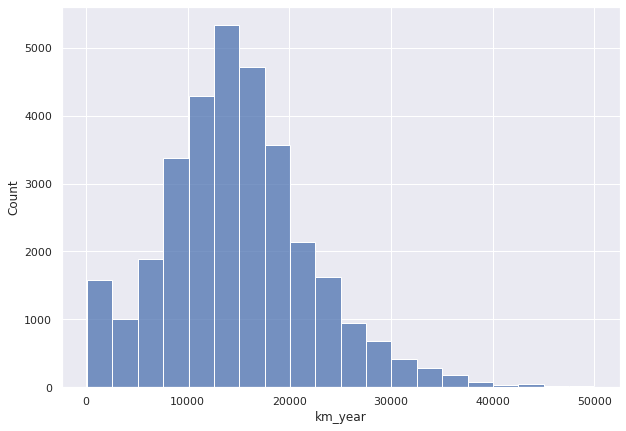

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year', bins = 20);

#### Проверка независимости нового признака от других
**<Визуализация зависимости удельного пробега за год, общего пробега и цены для автомобилей с различными видами коробок передач>**

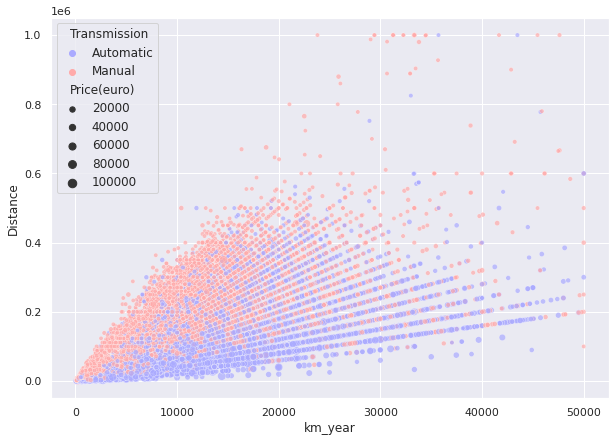

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_year",
    y="Distance",
    hue="Transmission",
    size = "Price(euro)",
    alpha = 0.7,
    palette='bwr');

**<Визуализация зависимости пробега в год, года выпуска и цены для автомобилей с различными видами коробок передач>**

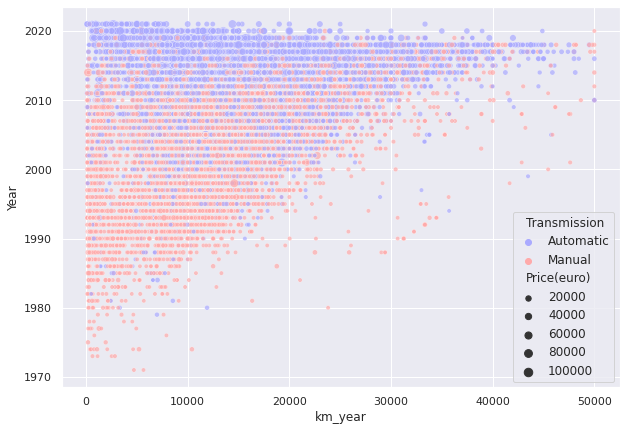

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_year", y="Year",
    hue="Transmission",
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

# 2. Добавление в модель дополнительных признаков на основе имеющихся (задание)

### 2.1 Квантильные категории для столбца "Удельный пробег за год"

In [ ]:
# Получим статистику по столбцу 'km_year'
df['km_year'].describe()

count    32220.000000
mean     14954.229373
std       7337.012277
min        100.000000
25%      10271.827206
50%      14461.538462
75%      18888.888889
max      50000.000000
Name: km_year, dtype: float64

In [ ]:
# Добавим новый признак "Относительный удельный пробег за год"
# исходя из приведенных выше квантильных значений.
def categorize_km_year(km_year):
    if km_year < 10272:
        return 'less_than_average_km'
    elif km_year > 18889:
        return 'more_than_average_km'
    else:
        return 'average_km'


df['relative_km_year'] = df['km_year'].apply(categorize_km_year)

In [ ]:
# Проверим получившийся датафрейм
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32215  Volkswagen        Passat  2016      Sedan   88000.0   
32216  Land Rover    Freelander  2002  Crossover  225000.0   
32217       Dacia     Logan Mcv  2015  Universal   89000.0   
32218       Mazda             6  2006      Combi  370000.0   
32219     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
0                    1800.0        Hybrid    Automatic       7750.0   11   
1                    1500.0        Diesel       Manual       8550.0    8   
2                    1500.0        Diesel       Manual       6550.0   10   
3                    1600.0  Metan/Propan       Manual       4100.0   16   
4                    2200.0        Diesel       Manual       3490.0   22   
...                     ...           ...          ...          ...  ...   
32215                1800.0        Petrol    Automatic      11500.0    6   
32216                1800.0  Metan/Propan       Manual       4400.0   20   
32217                1500.0        Diesel       Manual       7000.0    7   
32218                2000.0        Diesel       Manual       4000.0   16   
32219                1500.0        Diesel       Manual       4000.0   16   

            km_year      relative_km_year  
0      17727.272727            average_km  
1      16875.000000            average_km  
2      11000.000000            average_km  
3      12500.000000            average_km  
4      13636.363636            average_km  
...             ...                   ...  
32215  14666.666667            average_km  
32216  11250.000000            average_km  
32217  12714.285714            average_km  
32218  23125.000000  more_than_average_km  
32219  18750.000000            average_km  

[32220 rows x 12 columns]

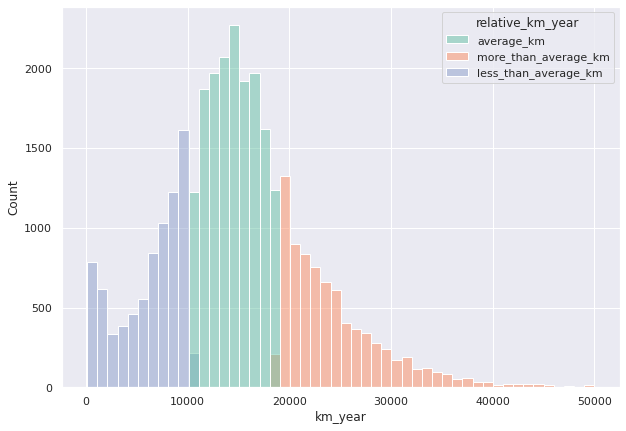

In [ ]:
# Визуализируем распределение нового признака.
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'km_year',
             hue = 'relative_km_year',
             bins = 50,
             palette='Set2')

### 2.2 Новый признак - (условная) "Экологичность"
Как уже отмечалось выше, распределение цен в зависимости от импользуемых видов топлива свидетельствует о более высокой стоимости гибридных автомобилей.
Сравним средние цены:

In [ ]:
df.groupby(by=['Fuel_type'])['Price(euro)'].mean()

Fuel_type
Diesel            10336.477891
Electric          12449.833333
Hybrid            14624.609358
Metan/Propan       5224.789564
Petrol             8356.536990
Plug-in Hybrid    18393.212329
Name: Price(euro), dtype: float64

Добавим новый признак - "Экологичность", отнеся к условно "экологичным" обычные гибриды, Plug-in гибриды и электромобили, средние цены на которые значительно выше цен на другие виды автомобилей.

In [ ]:
green_cars = ['Electric', 'Hybrid', 'Plug-in Hybrid']
def is_green(fuel):
    if fuel in green_cars:
        return 1
    else:
        return 0


df['green_car'] = df['Fuel_type'].apply(is_green)

In [ ]:
# Проверим получившийся датафрейм
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32215  Volkswagen        Passat  2016      Sedan   88000.0   
32216  Land Rover    Freelander  2002  Crossover  225000.0   
32217       Dacia     Logan Mcv  2015  Universal   89000.0   
32218       Mazda             6  2006      Combi  370000.0   
32219     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
0                    1800.0        Hybrid    Automatic       7750.0   11   
1                    1500.0        Diesel       Manual       8550.0    8   
2                    1500.0        Diesel       Manual       6550.0   10   
3                    1600.0  Metan/Propan       Manual       4100.0   16   
4                    2200.0        Diesel       Manual       3490.0   22   
...                     ...           ...          ...          ...  ...   
32215                1800.0        Petrol    Automatic      11500.0    6   
32216                1800.0  Metan/Propan       Manual       4400.0   20   
32217                1500.0        Diesel       Manual       7000.0    7   
32218                2000.0        Diesel       Manual       4000.0   16   
32219                1500.0        Diesel       Manual       4000.0   16   

            km_year      relative_km_year  green_car  
0      17727.272727            average_km          1  
1      16875.000000            average_km          0  
2      11000.000000            average_km          0  
3      12500.000000            average_km          0  
4      13636.363636            average_km          0  
...             ...                   ...        ...  
32215  14666.666667            average_km          0  
32216  11250.000000            average_km          0  
32217  12714.285714            average_km          0  
32218  23125.000000  more_than_average_km          0  
32219  18750.000000            average_km          0  

[32220 rows x 13 columns]

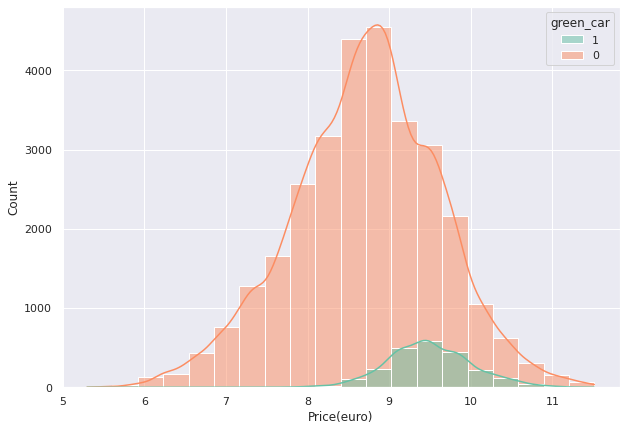

In [ ]:
# Визуализируем распределение цен на автомобили в зависимости от
# нового признака.
# (Для большей наглядности используются логарифмические значения цен.>)
plt.figure(figsize=(10,7))
sns.histplot(
    data=df,
    x=np.log(df['Price(euro)']),
    bins=20,
    hue='green_car',
    hue_order=(1,0),
    kde=True,
    palette='Set2'
    );

<Далее продолжается выполнение операций в соответствии с блокнотом "Неделя 2">

### Удаление аномалий и связанных признаков

**Анализ аномалий с использованием boxplot - метода**

In [ ]:
# Добавляем "Удельный пробег за год" в список числовых признаков.
num_columns.append('km_year')
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

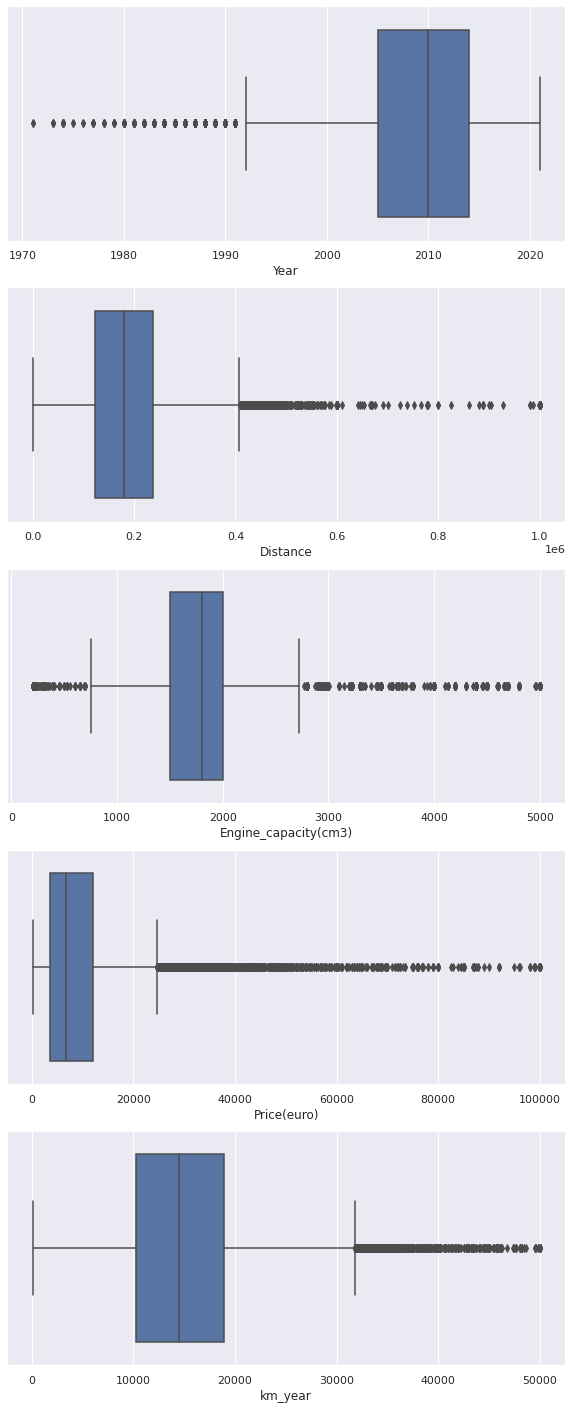

In [ ]:
# Построим диаграммы Boxplot для числовых признаков.
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

Boxplot анализ показателя объема двигателя подтверждает ранее высказанные сомнения относительно большого числа сильно заниженных данных. Остановимся на этом вопросе поподробнее.

### Подробный анализ данных об объемах двигателей

Попробуем более детально рассмотреть низкие значения объемов двигателей.
По величине рабочего объёма бензиновые автомобильные двигатели часто делятся на микролитражные (до 1,1 л), малолитражные (1,2-1, 8л), среднелитражные (1,8-3,5 л) и крупнолитражные (свыше 3,5 л).
Построим гистограмму распределения объемов двигателей для двух младших классов (понимая при этом, что не все двигатели бензиновые) с учетом типа используемого топлива.

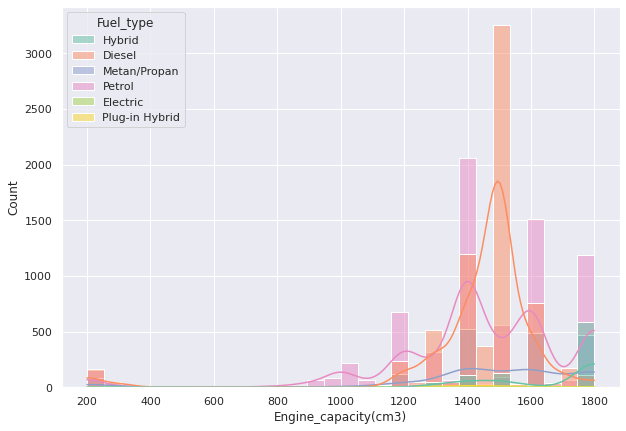

In [ ]:
small_engines = df[df['Engine_capacity(cm3)']<=1800]

plt.figure(figsize=(10,7))
sns.histplot(
    data=small_engines,
    x='Engine_capacity(cm3)',
    bins=30,
    hue='Fuel_type',
    kde=True,
    palette='Set2'
    );

"Увеличим разрешение", чтобы лучше рассмотреть аномальные значения менее 800 куб. см.

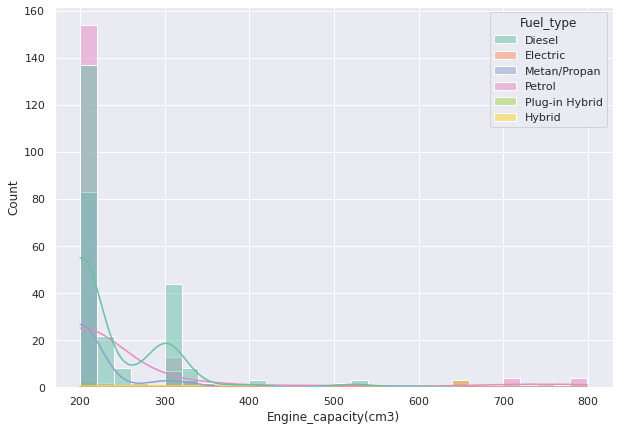

In [ ]:
small_engines = df[df['Engine_capacity(cm3)']<800]

plt.figure(figsize=(10,7))
sns.histplot(
    data=small_engines,
    x='Engine_capacity(cm3)',
    bins=30,
    hue='Fuel_type',
    kde=True,
    palette='Set2'
    );

Очевидно, что большинство аномальных значений находится в диапазоне от 200 до 350 куб. см.
Посмотрим, какие производители выпускают "такие" автомобили.

In [ ]:
df[df['Engine_capacity(cm3)']<=350]['Make'].value_counts()

Mercedes      94
BMW           85
Volkswagen    63
Audi          40
Toyota        29
Opel          19
Hyundai       18
Ford          17
Nissan        16
Lexus         12
Mazda         11
Honda         11
Skoda         11
Volvo         10
Mitsubishi     9
Renault        6
Rover          5
KIA            5
Land Rover     5
Citroen        5
Peugeot        4
Chrysler       3
Vaz            3
Porsche        3
Brilliance     3
Daewoo         3
Great Wall     2
Saab           2
Jeep           2
Subaru         2
Fiat           1
Jaguar         1
UAZ            1
Suzuki         1
Mini           1
Infiniti       1
Name: Make, dtype: int64

Для сравнения используем сайт Auto.ru. На момент просмотра (25.12.2022) в разделе "Купить автомобиль" (без применения каких-либо фильтров) было 389 923 предложения. Если установить фильтр "объем двигателя до 0,4 л." предложений остается всего 17. В пяти случаях к продаже предлагается современный китайский микролитражный автомобиль Bajaj Qute I с объемом двигателя 200 куб. см, а в остальных - различные модификации автомотоколясок производства Серпуховского мотоциклетного (в настоящее время - автомобильного) завода преимущественно советских годов выпуска с объемом двигателя 400 куб. см.
(См. https://auto.ru/cars/all/?displacement_to=400)

Таким образом с учетом гистограмм, приведенных выше, все значения объемов двигателя менее 800 куб. см. можно отнести к аномальным.
Вероятнее всего, при составлении датасета регулярно возникала ошибка пересчета литров в куб. см. и требуемое значение уменьшалось в 10 раз.
В любом случае, такие аномальные значения правильнее исключить.

Но до проведения этой операции отдельно можно остановиться на значениях "объема двигателя" для категории "электромобили" и в целом на качестве данных, относящихся к этой категории.


### Подробный анализ данных об электромобилях

In [ ]:
# Проверим, сколько всего данных об электромобилях.
#len(df[df['Fuel_type']=='Electric'])
df['Fuel_type'].value_counts()

Diesel            15288
Petrol            11138
Metan/Propan       3488
Hybrid             1838
Plug-in Hybrid      438
Electric             30
Name: Fuel_type, dtype: int64

In [ ]:
# Так как число строк небольшое, выведем их все.
df[df['Fuel_type']=='Electric']

Make      Model  Year      Style  Distance  Engine_capacity(cm3)  \
21          Tesla    Model S  2013  Hatchback  113000.0                 367.0   
139          Audi  A3 e-tron  2016  Hatchback  145000.0                1400.0   
1590          BMW         i3  2017  Hatchback   62000.0                 647.0   
1645      Renault     Kangoo  2012    Minivan   88000.0                1500.0   
1726       Nissan       Leaf  2014  Hatchback   60000.0                2000.0   
2050       Nissan       Leaf  2012  Hatchback   89100.0                 999.0   
3066      Renault        ZOE  2013  Hatchback   68455.0                2200.0   
3350      Renault        ZOE  2016  Hatchback   21200.0                4100.0   
4471          BMW         i3  2017  Hatchback   20000.0                 647.0   
5745         Ford     Escape  2010  Universal  200000.0                2500.0   
7971        Tesla    Model S  2016  Hatchback   52000.0                 450.0   
9250   Volkswagen       Golf  2000  Hatchback   35566.0                1900.0   
12574         BMW         i3  2017  Hatchback   40000.0                 650.0   
12944      Nissan       Leaf  2014      Sedan   70360.0                1500.0   
13048      Nissan       Leaf  2012  Hatchback   89000.0                1445.0   
14124        Fiat        500  2015      Coupe   79625.0                1000.0   
14382        Ford  Fiesta 5D  2010   Roadster   10000.0                2000.0   
15090       Lexus  RX Series  1990   Microvan    8700.0                3000.0   
15228    Mercedes    E Class  2002      Sedan  200000.0                 320.0   
15235  Mitsubishi    Grandis  2008   Roadster  666779.0                2000.0   
16916     Renault  City K-ZE  2019  Hatchback   10000.0                1000.0   
19946         KIA       Soul  2014  Hatchback   22675.0                1300.0   
20532     Renault    Fluence  2013      Sedan  156000.0                1000.0   
22404      Toyota      Prius  2005  Hatchback  125000.0                1500.0   
23193      Nissan       Leaf  2012  Hatchback   23000.0                1000.0   
23334     Renault        ZOE  2013  Hatchback   79500.0                2200.0   
23802   Chevrolet       Volt  2018  Hatchback   52935.0                1500.0   
23953     Renault        ZOE  2017  Hatchback   92000.0                4100.0   
26733   Chevrolet       Volt  2011      Sedan  115000.0                1400.0   
29828       Tesla    Model S  2015      Sedan   65000.0                 772.0   

      Fuel_type Transmission  Price(euro)  Age       km_year  \
21     Electric    Automatic      27000.0    9  12555.555556   
139    Electric    Automatic      16450.0    6  24166.666667   
1590   Electric    Automatic      19999.0    5  12400.000000   
1645   Electric    Automatic       4000.0   10   8800.000000   
1726   Electric    Automatic      10200.0    8   7500.000000   
2050   Electric    Automatic       6999.0   10   8910.000000   
3066   Electric    Automatic       7850.0    9   7606.111111   
3350   Electric    Automatic      11899.0    6   3533.333333   
4471   Electric    Automatic      25999.0    5   4000.000000   
5745   Electric    Automatic       9200.0   12  16666.666667   
7971   Electric    Automatic      39900.0    6   8666.666667   
9250   Electric    Automatic        600.0   22   1616.636364   
12574  Electric    Automatic      18999.0    5   8000.000000   
12944  Electric    Automatic       8400.0    8   8795.000000   
13048  Electric    Automatic       7200.0   10   8900.000000   
14124  Electric    Automatic       8900.0    7  11375.000000   
14382  Electric    Automatic      10000.0   12    833.333333   
15090  Electric    Automatic       8700.0   32    271.875000   
15228  Electric    Automatic       1300.0   20  10000.000000   
15235  Electric       Manual       8000.0   14  47627.071429   
16916  Electric    Automatic       7500.0    3   3333.333333   
19946  Electric    Automatic      12500.0    8   2834.375000   
20532  Electric    Automatic 

Сразу заметно, что далеко не все представленные здесь модели являются электромобилями.

Учитывая небольшой объем данных, попробуем разобраться с ними "вручную".

1) Однозначно к электромобилям относятся только следующие модели:
- Tesla Model S (https://ru.wikipedia.org/wiki/Tesla_Model_S)
- BMW i3 (https://ru.wikipedia.org/wiki/BMW_i3)
- Nissan Leaf (https://ru.wikipedia.org/wiki/Nissan_LEAF)
- Renault ZOE (https://ru.wikipedia.org/wiki/Renault_ZOE)
- Renault City K-ZE (https://en.wikipedia.org/wiki/Renault_Kwid#Renault_City_K-ZE)

2) Могут быть электромобилями:
- Renault Kangoo 2012 года выпуска может быть как электромобилем, так и бензиновым или дизельным (https://ru.wikipedia.org/wiki/Renault_Kangoo), хотя указанный объем двигателя в 1500 куб. см. говорит не в пользу электрической версии.
- Renault Fluence 2013 года выпуска также может быть как электромобилем, так и бензиновым. (https://ru.wikipedia.org/wiki/Renault_Fluence)

3) Не могут быть электромобилями, но с высокой степенью вероятности можно установить тип автомобиля:
- Audi A3 e-tron 2016 года выпуска - гибридный автомобиль с возможностью подзарядки от электросети (Plug-in hybrid). (https://www.wikiwand.com/en/Audi_e-tron_(brand))
- Fiat 500 может быть только бензиновым. (https://ru.wikipedia.org/wiki/Fiat_500_(2007))
- Lexus RX Series может быть только бензиновым (https://ru.wikipedia.org/wiki/Lexus_RX), хотя в 1990 году он еще не выпускался, и это не микровэн, a хэтчбек.
- Mitsubishi Grandis 2008 года выпуска с объемом двигателя 2000 куб. см. - вероятно, дизельный. (https://en.wikipedia.org/wiki/Mitsubishi_Grandis)
- Chevrolet Volt - Plug-in hybrid. (https://ru.wikipedia.org/wiki/Chevrolet_Volt)

4) Не могут быть электромобилями, но однозначно установить тип автомобиля не представляется возможным:
- Ford Escape 2010 года выпуска может быть либо гибридным, либо бензиновым. (https://en.wikipedia.org/wiki/Ford_Escape#Hybrid_2)
- Volkswagen Golf 2000 года выпуска/4-го поколения/ может быть как бензиновым, так и дизельным. (https://ru.wikipedia.org/wiki/Volkswagen_Golf_IV)
- Ford Fiesta 5D 2010 года выпуска /6-го поколения/, может быть как бензиновым, так и дизельным, хотя двигателя объемом 2000 куб. см. не было ни в бензиновой, ни в дизельной линейке. (https://en.wikipedia.org/wiki/Ford_Fiesta_(sixth_generation))
- Mercedes E Class 2002 года выпуска /2-го или 3-го поколения/ может быть как бензиновым, так и дизельным. (https://ru.wikipedia.org/wiki/Mercedes-Benz_E-класс)
- KIA Soul 2014 года выпуска /2-го или 3-го поколения/ может быть как бензиновым, так и дизельным, хотя двигателя объемом 1300 куб. см. не было ни в бензиновой, ни в дизельной линейке. (https://ru.wikipedia.org/wiki/Kia_Soul)
- Toyota Prius 2005 года выпуска может быть как обычным гибридом (https://ru.wikipedia.org/wiki/Toyota_Prius_(третье_поколение)), так и Plug-in гибридом (https://ru.wikipedia.org/wiki/Toyota_Prius_PHV).

Произведем следующие операции с данными о настоящих и мнимых электромобилях:

In [ ]:
# Для моделей, указанных в пунктах 1) и 2) выше, оставим значение 'Fuel_type'
# - 'Electric', а "объем двигателя" приравняем к величине, близкой к нулю.
# (У электромобилей ведь нет двигателей внутреннего сгорания! Но если
# приравнять к нулю, то в дальнейшем возникает ошибка при логарифмировании.)

electric_models = ['Model S',
                   'i3',
                   'Leaf',
                   'ZOE',
                   'City K-ZE',
                   'Kangoo',
                   'Fluence']
electric_cars = df[(df['Fuel_type']=='Electric') &
                   (df['Model'].isin(electric_models))]
df.loc[electric_cars.index, ['Engine_capacity(cm3)']] = 1.0e-10

# Проверим результат
df[(df['Fuel_type']=='Electric') & (df['Model'].isin(electric_models))]

Make      Model  Year      Style  Distance  Engine_capacity(cm3)  \
21       Tesla    Model S  2013  Hatchback  113000.0          1.000000e-10   
1590       BMW         i3  2017  Hatchback   62000.0          1.000000e-10   
1645   Renault     Kangoo  2012    Minivan   88000.0          1.000000e-10   
1726    Nissan       Leaf  2014  Hatchback   60000.0          1.000000e-10   
2050    Nissan       Leaf  2012  Hatchback   89100.0          1.000000e-10   
3066   Renault        ZOE  2013  Hatchback   68455.0          1.000000e-10   
3350   Renault        ZOE  2016  Hatchback   21200.0          1.000000e-10   
4471       BMW         i3  2017  Hatchback   20000.0          1.000000e-10   
7971     Tesla    Model S  2016  Hatchback   52000.0          1.000000e-10   
12574      BMW         i3  2017  Hatchback   40000.0          1.000000e-10   
12944   Nissan       Leaf  2014      Sedan   70360.0          1.000000e-10   
13048   Nissan       Leaf  2012  Hatchback   89000.0          1.000000e-10   
16916  Renault  City K-ZE  2019  Hatchback   10000.0          1.000000e-10   
20532  Renault    Fluence  2013      Sedan  156000.0          1.000000e-10   
23193   Nissan       Leaf  2012  Hatchback   23000.0          1.000000e-10   
23334  Renault        ZOE  2013  Hatchback   79500.0          1.000000e-10   
23953  Renault        ZOE  2017  Hatchback   92000.0          1.000000e-10   
29828    Tesla    Model S  2015      Sedan   65000.0          1.000000e-10   

      Fuel_type Transmission  Price(euro)  Age       km_year  \
21     Electric    Automatic      27000.0    9  12555.555556   
1590   Electric    Automatic      19999.0    5  12400.000000   
1645   Electric    Automatic       4000.0   10   8800.000000   
1726   Electric    Automatic      10200.0    8   7500.000000   
2050   Electric    Automatic       6999.0   10   8910.000000   
3066   Electric    Automatic       7850.0    9   7606.111111   
3350   Electric    Automatic      11899.0    6   3533.333333   
4471   Electric    Automatic      25999.0    5   4000.000000   
7971   Electric    Automatic      39900.0    6   8666.666667   
12574  Electric    Automatic      18999.0    5   8000.000000   
12944  Electric    Automatic       8400.0    8   8795.000000   
13048  Electric    Automatic       7200.0   10   8900.000000   
16916  Electric    Automatic       7500.0    3   3333.333333   
20532  Electric    Automatic       5300.0    9  17333.333333   
23193  Electric    Automatic       9000.0   10   2300.000000   
23334  Electric    Automatic       7700.0    9   8833.333333   
23953  Electric    Automatic      12900.0    5  18400.000000   
29828  Electric    Automatic      40000.0    7   9285.714286   

           relative_km_year  green_car  
21               average_km          1  
1590             average_km          1  
1645   less_than_average_km          1  
1726   less_than_average_km          1  
2050   less_than_average_km          1  
3066   less_than_average_km          1  
3350   less_than_average_km          1  
4471   less_than_average_km          1  
7971   less_than_average_km          1  
12574  less_than_average_km          1  
12944  less_than_average_km          1  
13048  less_than_average_km          1  
16916  less_than_average_km          1  
20532            average_km          1  
23193  less_than_average_km          1  
23334  less_than_average_km          1  
23953            average_km          1  
29828  less_than_average_km          1

In [ ]:
# Для автомобилей, указанных в пункте 3) выше, поменяем значение
# 'Fuel_type' и при необходимости поменяем значение вновь добавленного
# параметра 'green_car'.
df.loc[[139, 23802, 26733], ['Fuel_type']] = 'Plug-in Hybrid'
df.loc[[14124, 15090], ['Fuel_type', 'green_car']] = ('Petrol', 0)
df.loc[15235, ['Fuel_type', 'green_car']] = ('Diesel', 0)

# Проверим результат
df.loc[[139, 14124, 15090, 15235, 23802, 26733]]

Make      Model  Year      Style  Distance  Engine_capacity(cm3)  \
139          Audi  A3 e-tron  2016  Hatchback  145000.0                1400.0   
14124        Fiat        500  2015      Coupe   79625.0                1000.0   
15090       Lexus  RX Series  1990   Microvan    8700.0                3000.0   
15235  Mitsubishi    Grandis  2008   Roadster  666779.0                2000.0   
23802   Chevrolet       Volt  2018  Hatchback   52935.0                1500.0   
26733   Chevrolet       Volt  2011      Sedan  115000.0                1400.0   

            Fuel_type Transmission  Price(euro)  Age       km_year  \
139    Plug-in Hybrid    Automatic      16450.0    6  24166.666667   
14124          Petrol    Automatic       8900.0    7  11375.000000   
15090          Petrol    Automatic       8700.0   32    271.875000   
15235          Diesel       Manual       8000.0   14  47627.071429   
23802  Plug-in Hybrid    Automatic      14800.0    4  13233.750000   
26733  Plug-in Hybrid    Automatic       9700.0   11  10454.545455   

           relative_km_year  green_car  
139    more_than_average_km          1  
14124            average_km          0  
15090  less_than_average_km          0  
15235  more_than_average_km          0  
23802            average_km          1  
26733            average_km          1

In [ ]:
# Удалим строки с данными об автомобилях, указанных в пункте 4) выше.
df.drop([5745, 9250, 14382, 15228, 19946, 22404], inplace=True)

# Обновим индекс и проверим размер датафрейма.
df = df.reset_index(drop=True)
df.shape

(32214, 13)

*Очевидно, что представленный выше способ чистки данных крайне неэффективен, но он позволяет еще раз убедиться, что исходные данные довольно низкого качества, что вызывает определенные сомнения в возможности дальнейшей результативной работы с ними.*

**Вернемся к вопросу об аномальных значениях объемов двигателей менее 800 куб. см.**

(См. выше в разделе "Подробный анализ данных об объемах двигателей")

In [ ]:
# Удалим эти данные
questionable_engine = df[(df["Engine_capacity(cm3)"] < 800) &
                         (df["Engine_capacity(cm3)"] != 0)]
df = df.drop(questionable_engine.index)

# Обновим индекс и проверим размер датафрейма.
df = df.reset_index(drop=True)
df.shape

(31655, 13)

#### Корреляция численных столбцов

(Принимаем во внимание, что вновь добавленный признак 'green_car', который по сути является категориальным, также будет учтен при построении корреляционной матрицы, поскольку его значения с самого начала были приведены к численным.)

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True)
df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

Выводы: Наглядно видна прямая зависимость цены от года выпуска и в меньшей степени от объема двигателя, а также обратная зависимость от пробега. Возраст автомобиля, как и следовало ожидать, полностью скореллирован с годом выпуска с коэффициентом -1, так что один из этих показателей в дальнейшем будет необходимо исключить. Цена, как оказалось, находится в прямой (хоть и довольно слабо выраженной) зависимости с удельным пробегом за год, что может свидетельствовать об обратной причинно-следственной связи - на более дорогих машинах в среднем ездят больше. Также можно отметить некоторую положительную корреляцию цены с "экологичностью" автомобиля. В данном случае может идти речь как и о более высоких начальных ценах на такие автомобили, так и об их относительной привлекательности для вторичного рынка, поскольку бОльшие первоначальные затраты на их приобретение в дальнейшем могут компенсироваться меньшими затратами на топливо или (в случае электромобилий) на электроэнергию.

## Категориальные данные
Посмотрим на число повторений результата в каждом категориальном признаке.

In [ ]:
df[cat_columns].nunique()

Make             77
Model           768
Style            12
Fuel_type         5
Transmission      2
dtype: int64

**Сокращение числа категорий**

Сократим редкие категории для каждого из признаков, объединив их в новую категорию rare.
Для названия производителя сделаем исключение - введем две новые категории Rare Expensive ("дорогие редкие") и Rare Cheap ("дешевые редкие).

# 2. Добавление в модель дополнительных признаков на основе имеющихся (продолжение)

### 2.2 «Умная» замена на редкие категории - признак Make

In [ ]:
# Рассмотрим подробнее значения признака Make
counts = df.Make.value_counts()
counts

Volkswagen    3359
Toyota        3053
Mercedes      2919
BMW           2492
Renault       2333
              ... 
Zotye            1
Tata             1
Abarth           1
Groz             1
Pontiac          1
Name: Make, Length: 77, dtype: int64

In [ ]:
# Найдем медианное значение
counts.median()

32.0

In [ ]:
# Выведем список названий производителей, встречающихся реже 100 раз.
counts[counts<100]

Rover               87
Chrysler            80
Jeep                75
Mini                71
Infiniti            66
Jaguar              63
Daewoo              58
Dodge               49
Lincoln             48
Alfa Romeo          38
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Smart               26
Daihatsu            25
UAZ                 20
Chery               18
Lancia              17
Cadillac            16
Great Wall          15
Acura               14
Byd                 14
Saab                13
Zaz                 13
Alta marca          13
Brilliance          11
Lifan               10
Lada                 9
Isuzu                6
GMC                  5
Ravon                5
Buick                5
Maserati             4
LuAZ                 4
Datsun               3
Scion                3
Haima                3
Geely                3
Hummer               2
ARO                  2
Mercedes-Maybach     2
Faw                  2
Changan              1
Saturn     

In [ ]:
# Выделим производителей, которые встречаются реже 25 раз.
rare =  counts[(counts.values < 25)]
rare

UAZ                 20
Chery               18
Lancia              17
Cadillac            16
Great Wall          15
Acura               14
Byd                 14
Saab                13
Zaz                 13
Alta marca          13
Brilliance          11
Lifan               10
Lada                 9
Isuzu                6
GMC                  5
Ravon                5
Buick                5
Maserati             4
LuAZ                 4
Datsun               3
Scion                3
Haima                3
Geely                3
Hummer               2
ARO                  2
Mercedes-Maybach     2
Faw                  2
Changan              1
Saturn               1
Zotye                1
Tata                 1
Abarth               1
Groz                 1
Pontiac              1
Name: Make, dtype: int64

In [ ]:
# Найдем медианное значение цен всех автомобилей.
median_price = df['Price(euro)'].median()
median_price

6799.0

In [ ]:
# Найдем медианные значения цен автомобилей редких производителей
df_rare = df[df['Make'].isin(rare.index)]
rare_make_median_prices = df_rare.groupby(by='Make')['Price(euro)'].median()
rare_make_median_prices

Make
ARO                  7000.0
Abarth               7200.0
Acura                9994.5
Alta marca           2500.0
Brilliance           1950.0
Buick               12500.0
Byd                  1900.0
Cadillac            19193.5
Changan             12499.0
Chery                2250.0
Datsun               2999.0
Faw                  2000.0
GMC                 17550.0
Geely                2100.0
Great Wall           4199.0
Groz                 4200.0
Haima                2800.0
Hummer              20000.0
Isuzu                4649.5
Lada                 2200.0
Lancia               3500.0
Lifan                1299.5
LuAZ                  800.0
Maserati            45000.0
Mercedes-Maybach    11275.0
Pontiac              2000.0
Ravon                4800.0
Saab                 4500.0
Saturn               3250.0
Scion                9499.0
Tata                 2150.0
UAZ                  1999.5
Zaz                   800.0
Zotye               12000.0
Name: Price(euro), dtype: float64

In [ ]:
# Разделим редких производителей на "дорогих" и "дешевых".
# "Дорогие":
rare_make_expensive = rare_make_median_prices.loc[lambda x : x > median_price]
rare_make_expensive

Make
ARO                  7000.0
Abarth               7200.0
Acura                9994.5
Buick               12500.0
Cadillac            19193.5
Changan             12499.0
GMC                 17550.0
Hummer              20000.0
Maserati            45000.0
Mercedes-Maybach    11275.0
Scion                9499.0
Zotye               12000.0
Name: Price(euro), dtype: float64

In [ ]:
# "Дешевые":
rare_make_cheap = rare_make_median_prices.loc[lambda x : x <= median_price]
rare_make_cheap

Make
Alta marca    2500.0
Brilliance    1950.0
Byd           1900.0
Chery         2250.0
Datsun        2999.0
Faw           2000.0
Geely         2100.0
Great Wall    4199.0
Groz          4200.0
Haima         2800.0
Isuzu         4649.5
Lada          2200.0
Lancia        3500.0
Lifan         1299.5
LuAZ           800.0
Pontiac       2000.0
Ravon         4800.0
Saab          4500.0
Saturn        3250.0
Tata          2150.0
UAZ           1999.5
Zaz            800.0
Name: Price(euro), dtype: float64

In [ ]:
# Произведем замену категорий
df['Make'] = df['Make'].replace(rare_make_expensive.index.values,
                                'Rare Expensive')
df['Make'] = df['Make'].replace(rare_make_cheap.index.values,
                                'Rare Cheap')
# Проверим результат
df.Make.value_counts().tail(20)

Rare Cheap        183
Fiat              181
Suzuki            152
Subaru            148
Rover              87
Chrysler           80
Jeep               75
Mini               71
Infiniti           66
Jaguar             63
Daewoo             58
Rare Expensive     56
Dodge              49
Lincoln            48
Alfa Romeo         38
Ssangyong          32
GAZ                31
Moskvich / Izh     30
Smart              26
Daihatsu           25
Name: Make, dtype: int64

#### Замена других редких категорий
**Модели**

In [ ]:
# Рассмотрим значения признака Model
counts = df.Model.value_counts()
counts

E Class            1054
5 Series            983
Passat              836
Megane              801
Astra               791
                   ... 
GW Peri               1
WRX                   1
4007                  1
Grande Punto 5D       1
Siber                 1
Name: Model, Length: 768, dtype: int64

In [ ]:
# Найдем медианное значение
counts.median()

9.0

In [ ]:
# Выведем список моделей, встречающихся реже 100 раз.
counts[counts<100]

Primera            98
Clio               97
X-Trail            91
Juke               88
Combo              88
                   ..
GW Peri             1
WRX                 1
4007                1
Grande Punto 5D     1
Siber               1
Name: Model, Length: 696, dtype: int64

In [ ]:
# Произведем замену всех моделей, встречающихся реже 50 раз, на Rare.
counts = df.Model.value_counts()
rare =  counts[(counts.values <  50)]
df['Model'] = df['Model'].replace(rare.index.values, 'Rare')
df.Model.value_counts()

Rare             6524
E Class          1054
5 Series          983
Passat            836
Megane            801
                 ... 
GLC                52
Viano              51
Accent             51
Avensis Verso      50
Matrix             50
Name: Model, Length: 135, dtype: int64

## Сохранение DataFrame в файл

In [ ]:
df.to_csv('/content/cars_moldova_clean.csv',index=False)

# 3. Предварительная обработка очищенных данных (задание)
#### **Нормализация**

In [ ]:
df_clean_norm = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_clean_norm[num_columns] = (df[num_columns]- Xmin)/(Xmax - Xmin)

In [ ]:
# Проверим получившийся датафрейм
df_clean_norm.head()

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0    Toyota         Prius  0.80  Hatchback  0.194919              0.238095   
1   Renault  Grand Scenic  0.86  Universal  0.134913              0.166667   
2   Renault        Laguna  0.82  Universal  0.109911              0.166667   
3      Opel         Astra  0.70  Universal  0.199920              0.190476   
4  Mercedes          Vito  0.58   Microvan  0.299930              0.333333   

      Fuel_type Transmission  Price(euro)  Age   km_year relative_km_year  \
0        Hybrid    Automatic     0.075651   11  0.353252       average_km   
1        Diesel       Manual     0.083667    8  0.336172       average_km   
2        Diesel       Manual     0.063627   10  0.218437       average_km   
3  Metan/Propan       Manual     0.039078   16  0.248497       average_km   
4        Diesel       Manual     0.032966   22  0.271270       average_km   

   green_car  
0          1  
1          0  
2          0  
3          0  
4          0

In [ ]:
# Сохраняем файл с нормализованными очищенными данными
df_clean_norm.to_csv('/content/cars_moldova_clean_normalized.csv',index=False)

#### **Стандартизация**

In [ ]:
df_clean_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
df_clean_scaled[num_columns] = (df[num_columns]-M)/STD

In [ ]:
# Проверим получившийся датафрейм
df_clean_scaled.head()

Make         Model      Year      Style  Distance  \
0    Toyota         Prius  0.367431  Hatchback  0.134191   
1   Renault  Grand Scenic  0.786964  Universal -0.488914   
2   Renault        Laguna  0.507275  Universal -0.748541   
3      Opel         Astra -0.331792  Universal  0.186116   
4  Mercedes          Vito -1.170860   Microvan  1.224624   

   Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
0             -0.167737        Hybrid    Automatic    -0.182458   11   
1             -0.688642        Diesel       Manual    -0.098695    8   
2             -0.688642        Diesel       Manual    -0.308102   10   
3             -0.515007  Metan/Propan       Manual    -0.564626   16   
4              0.526804        Diesel       Manual    -0.628495   22   

    km_year relative_km_year  green_car  
0  0.372423       average_km          1  
1  0.256283       average_km          0  
2 -0.544308       average_km          0  
3 -0.339902       average_km          0  
4 -0.185048       average_km          0

In [ ]:
# Сохраняем файл со стандартизированными очищенными данными
df_clean_scaled.to_csv('/content/cars_moldova_clean_scaled.csv',index=False)

#### **Нелинейное преобразование**

Сначала логарифмирование, потом стандартизация

In [ ]:
df_clean_power = df.copy()
df_clean_power[num_columns] = np.log(df_clean_power[num_columns])
M = df_clean_power[num_columns].mean()
STD = df_clean_power[num_columns].std()
df_clean_power[num_columns] = (df_clean_power[num_columns]-M)/STD

In [ ]:
# Проверим получившийся датафрейм
df_clean_power.head()

Make         Model      Year      Style  Distance  \
0    Toyota         Prius  0.368362  Hatchback  0.347076   
1   Renault  Grand Scenic  0.786340  Universal -0.099996   
2   Renault        Laguna  0.507757  Universal -0.348981   
3      Opel         Astra -0.329656  Universal  0.377857   
4  Mercedes          Vito -1.169577   Microvan  0.870813   

   Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
0             -0.046491        Hybrid    Automatic     0.200897   11   
1             -0.712734        Diesel       Manual     0.309652    8   
2             -0.712734        Diesel       Manual     0.014659   10   
3             -0.476896  Metan/Propan       Manual    -0.503973   16   
4              0.686804        Diesel       Manual    -0.682304   22   

    km_year relative_km_year  green_car  
0  0.460710       average_km          1  
1  0.396613       average_km          0  
2 -0.160095       average_km          0  
3  0.006204       average_km          0  
4  0.119398       average_km          0

In [ ]:
# Сохраняем файл с логарифмированнными и стандартизированными
# очищенными данными
df_clean_power.to_csv('/content/cars_moldova_clean_power.csv',index=False)

# Приведение категориальных признаков к численным

### Бинарные признаки
(Принимаем во внимание, что вновь добавленный признак 'green_car', который по сути является бинарным категориальным, с самого начала был приведен к численным признакам.)

In [ ]:
# Приведение признака Transmission к числовому.
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

### Кодирование многозначных признаков

Сначала рассмотрим вновь введенный признак "Относительный удельный пробег за год". Поскольку зависимость между его значениями хорошо понятна, его можно привести к численному таким же способом, как и бинарные признаки.

In [ ]:
df['relative_km_year']=df['relative_km_year'].map({'less_than_average_km': 0,
                                                   'average_km': 1,
                                                   'more_than_average_km': 2})

Остальные многозначные признаки кодируем, создавая отдельный датафрейм.

In [ ]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31655 entries, 0 to 31654
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  31655 non-null  int8   
 1   Model                 31655 non-null  int16  
 2   Year                  31655 non-null  int64  
 3   Style                 31655 non-null  int8   
 4   Distance              31655 non-null  float64
 5   Engine_capacity(cm3)  31655 non-null  float64
 6   Fuel_type             31655 non-null  int8   
 7   Transmission          31655 non-null  int8   
 8   Price(euro)           31655 non-null  float64
 9   Age                   31655 non-null  int64  
 10  km_year               31655 non-null  float64
 11  relative_km_year      31655 non-null  int64  
 12  green_car             31655 non-null  int64  
dtypes: float64(4), int16(1), int64(4), int8(4)
memory usage: 2.1 MB


In [ ]:
# Проверим получившийся датафрейм
df_se.head()

Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0    41     92  2011      4  195000.0                1800.0          1   
1    33     62  2014     11  135000.0                1500.0          0   
2    33     71  2012     11  110000.0                1500.0          0   
3    28     23  2006     11  200000.0                1600.0          2   
4    23    125  2000      5  300000.0                2200.0          0   

   Transmission  Price(euro)  Age       km_year  relative_km_year  green_car  
0             1       7750.0   11  17727.272727                 1          1  
1             0       8550.0    8  16875.000000                 1          0  
2             0       6550.0   10  11000.000000                 1          0  
3             0       4100.0   16  12500.000000                 1          0  
4             0       3490.0   22  13636.363636                 1          0

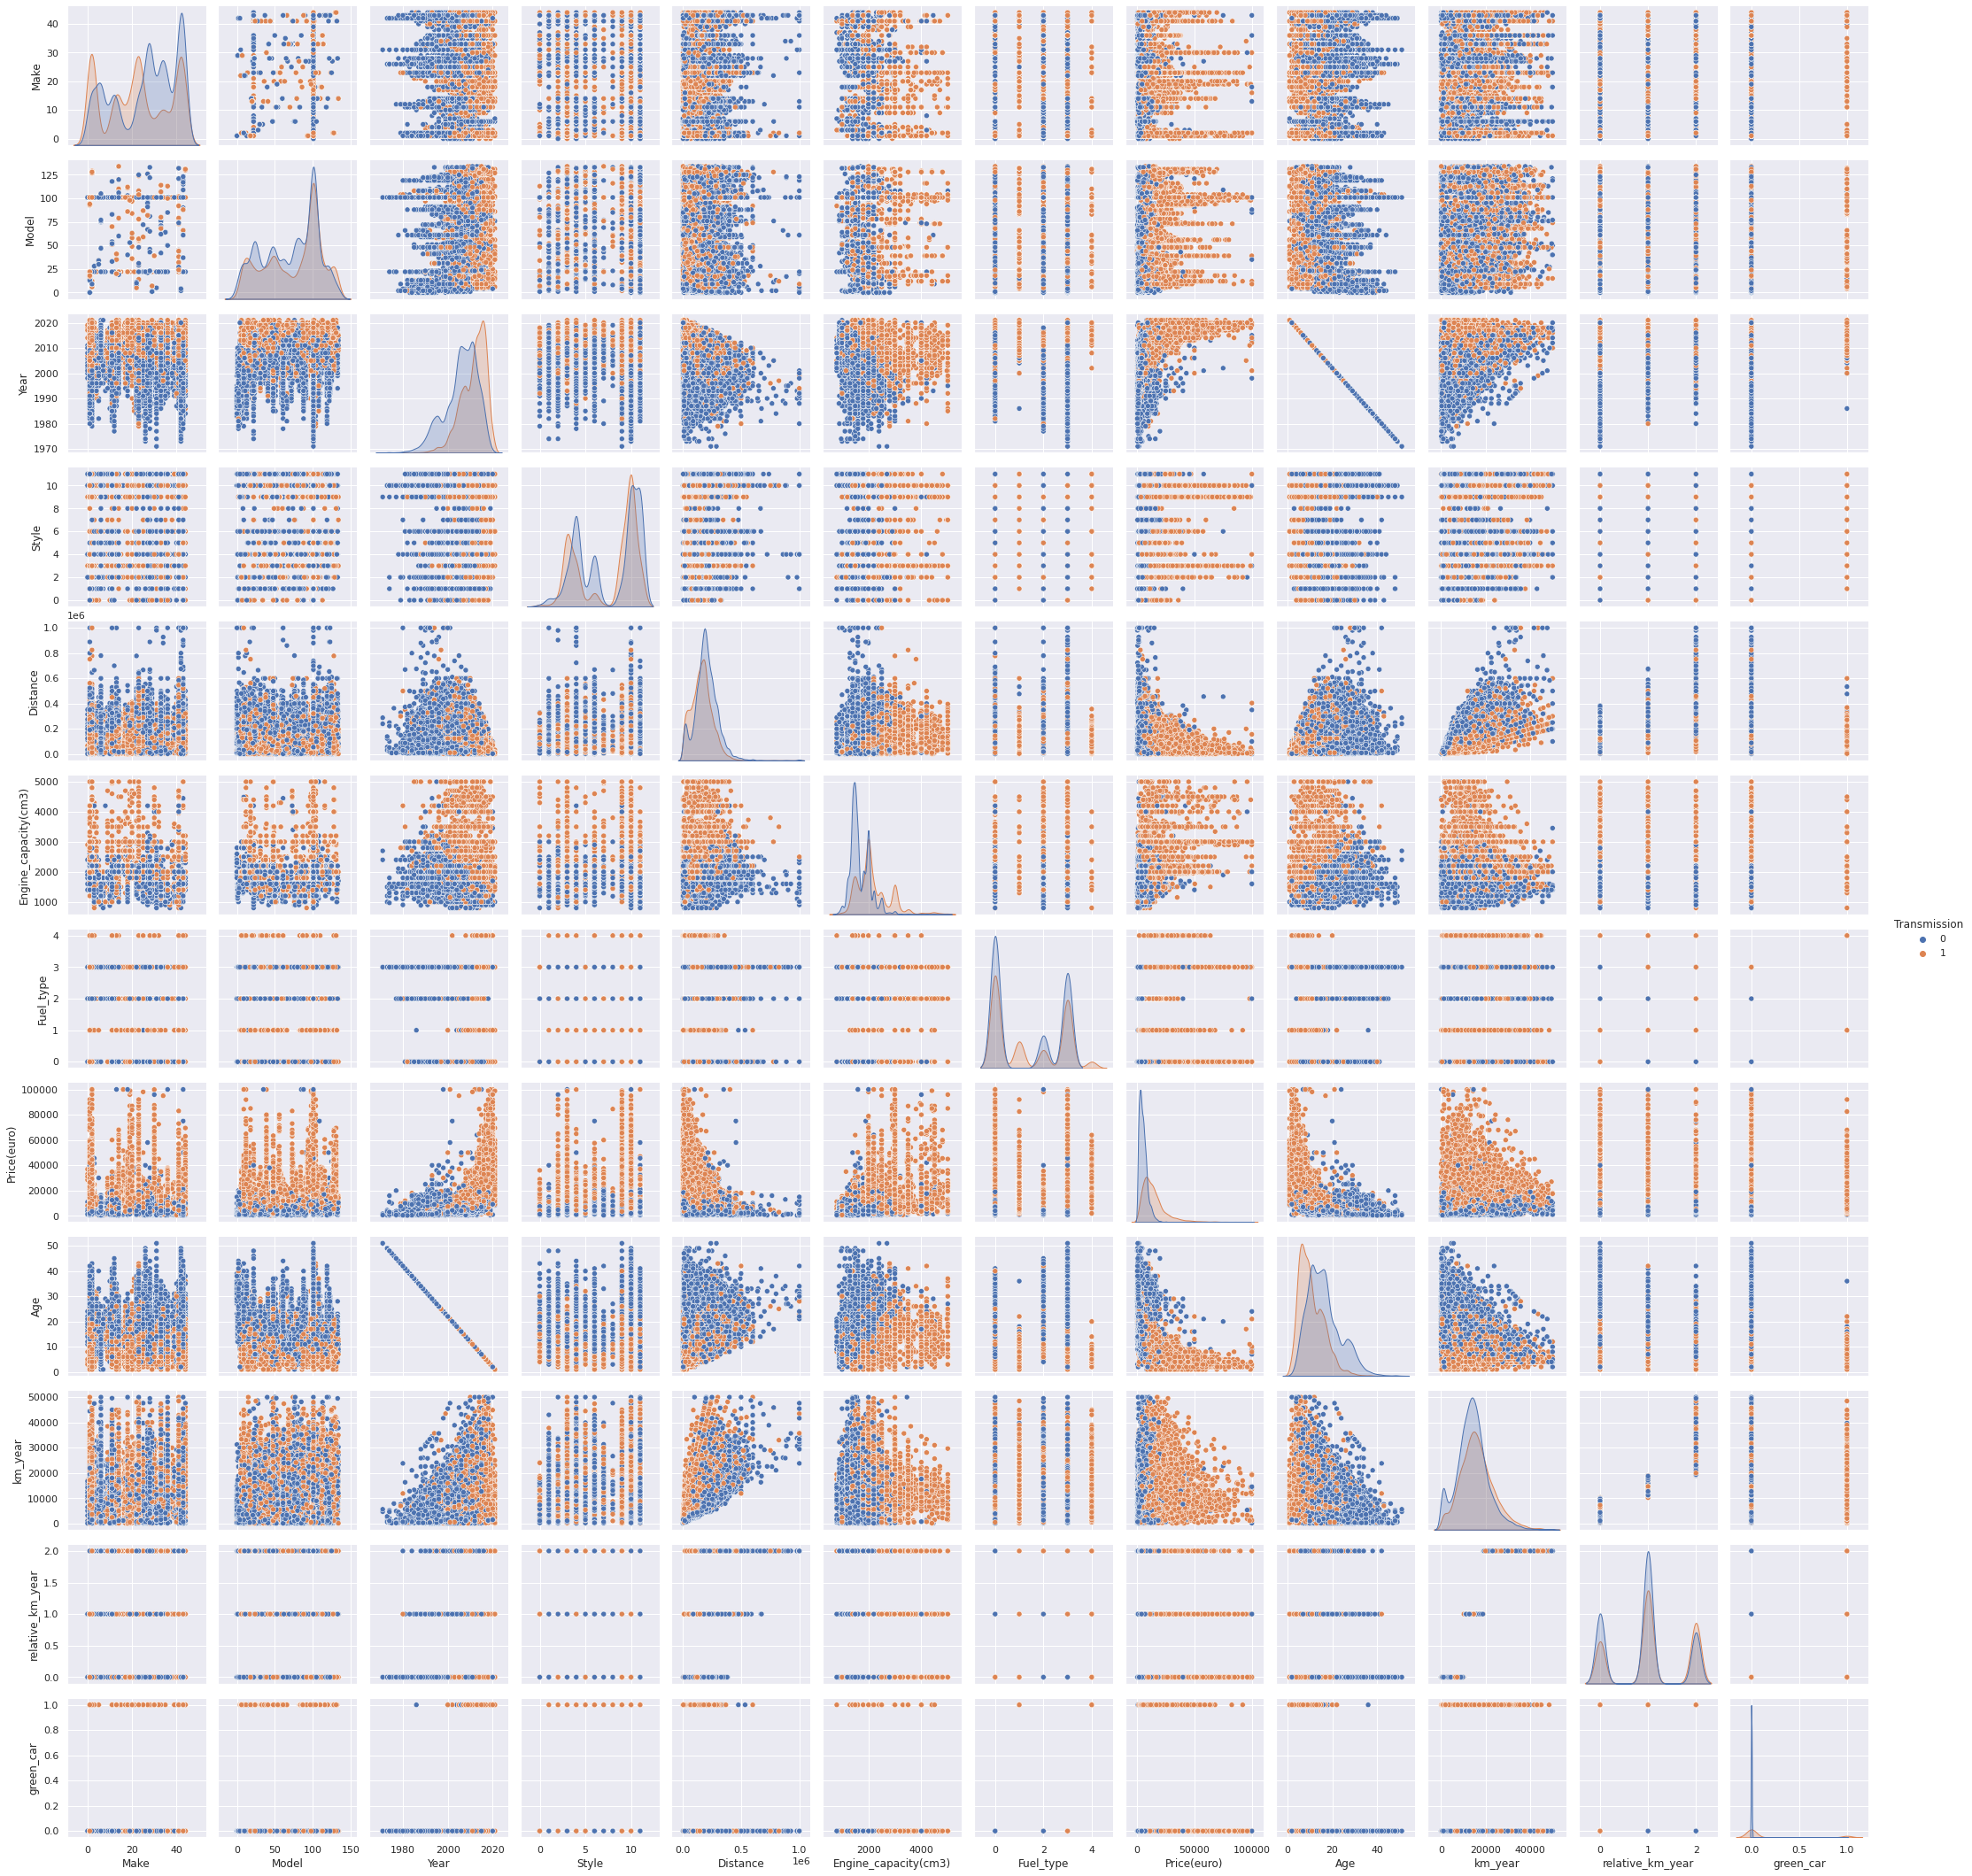

In [ ]:
# Визуализация зависимости целевой категории для задачи классификации
# ('Transmission') от числовых параметров

# <Выполнение в Colab заняло более 7 минут, поэтому строка закомментирована.>

#sns.pairplot(data = df_se, hue ='Transmission');

### One-hot кодирование многозначных признаков

In [ ]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

Year  Distance  Engine_capacity(cm3)  Transmission  Price(euro)  Age  \
31650  2016   88000.0                1800.0             1      11500.0    6   
31651  2002  225000.0                1800.0             0       4400.0   20   
31652  2015   89000.0                1500.0             0       7000.0    7   
31653  2006  370000.0                2000.0             0       4000.0   16   
31654  2006  300000.0                1500.0             0       4000.0   16   

            km_year  relative_km_year  green_car  Make_Alfa Romeo  ...  \
31650  14666.666667                 1          0                0  ...   
31651  11250.000000                 1          0                0  ...   
31652  12714.285714                 1          0                0  ...   
31653  23125.000000                 2          0                0  ...   
31654  18750.000000                 1          0                0  ...   

       Style_Pickup  Style_Roadster  Style_SUV  Style_Sedan  Style_Universal  \
31650             0               0          0            1                0   
31651             0               0          0            0                0   
31652             0               0          0            0                1   
31653             0               0          0            0                0   
31654             0               0          0            0                0   

       Fuel_type_Diesel  Fuel_type_Hybrid  Fuel_type_Metan/Propan  \
31650                 0                 0                       0   
31651                 0                 0                       1   
31652                 1                 0                       0   
31653                 1                 0                       0   
31654                 1                 0                       0   

       Fuel_type_Petrol  Fuel_type_Plug-in Hybrid  
31650                 1                         0  
31651                 0                         0  
31652                 0                         0  
31653                 0                         0  
31654                 0                         0  

[5 rows x 206 columns]

In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31655 entries, 0 to 31654
Columns: 206 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: float64(4), int64(5), uint8(197)
memory usage: 8.1 MB


### Сохранение DataFrame в файл


In [ ]:
df_se.to_csv('/content/cars_moldova_clean_cat_num.csv',index=False)
df_ohe.to_csv('/content/cars_moldova_clean_onehot.csv',index=False)